# **About Dataset -- Dataset From KAGGLE**

**Dataset --> insurance.csv(55.63 kB)**







**Problem statement: Accurately  Predict Insurance Costs.**

In this problem we need to see if we can predict how much a person will pay for insurance, our dataset has 1338 values ​​and 7 columns, here we will use the "insurance.csv" dataset. Below we will do analysis of the data, and then  we will apply polynomial regression to predict & test.

Data Exploration

Dataset contains 1338 data points with 7 variables each.

Each record contains the below data for specific person.

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance 

# **Dataset Upload**

In [ ]:
from google.colab import files
file = files.upload()

Saving insurance.csv to insurance.csv


# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Read Dataset**




In [ ]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Dataset Description**

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Total no. of Rows and Columns in dataset**

In [ ]:
df.shape

(1338, 7)

# **Missing Data Checking**

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset does not have any missing data

# **The first 5 columns of dataset**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **The last 5 columns of dataset**

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# **Correlation Analysis**

In [ ]:
cor = df.corr()
cor

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# **Heatmap**

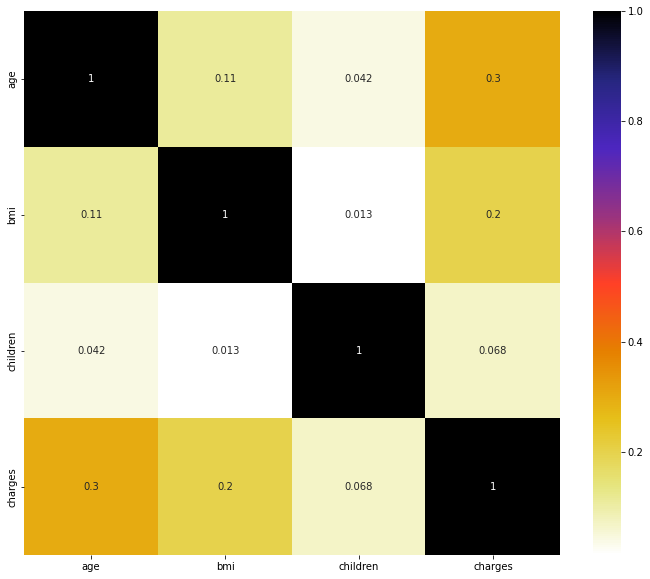

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

# **Exploratory Data Analysis**

## **Plotting Different types of graphs for Categorical and Continuous data analysis**

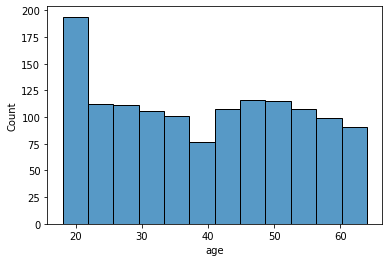

In [ ]:
sns.histplot(data = df, x = 'age', bins = 'auto')

Here, we can see that most of our base are younger people with a predominance between 20 and 30 years old.

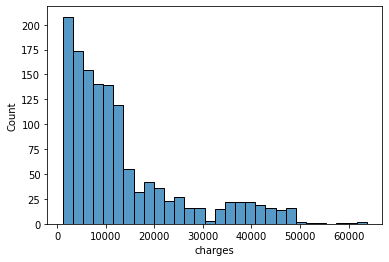

In [ ]:
sns.histplot(data = df, x = 'charges', bins = 'auto')

Here, we can see that  target variable 'charges' has most of base pays lower amounts, the higher the value increases, the less it has paying.

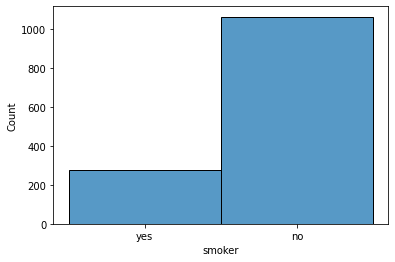

In [ ]:
sns.histplot(data = df, x = 'smoker', bins = 'auto')

 Here we can see,non-smoker are much more than smoker.

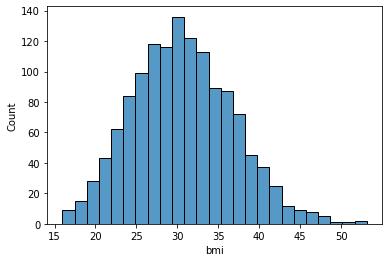

In [ ]:
sns.histplot(data = df, x = 'bmi', bins = 'auto')

Here, we see that we have BMI has practically a normal distribution with the top at 30

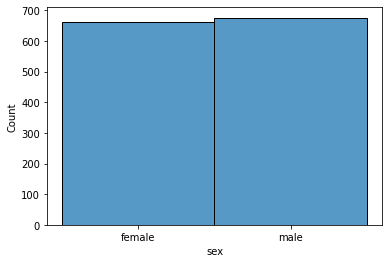

In [ ]:
sns.histplot(data = df, x = 'sex', bins = 'auto')

Here, we can see the male base is sightly higher than the female base.

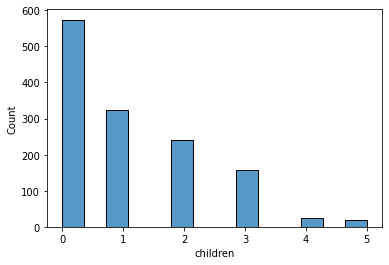

In [ ]:
sns.histplot(data = df, x = 'children', bins = 'auto')

Here, we can see higher number of children parent have to pay less health insurance compre to ones who does not have children.

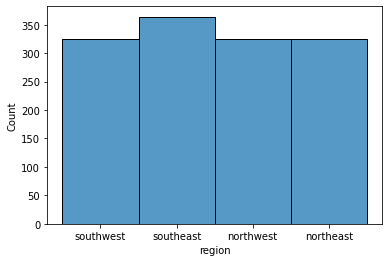

In [ ]:
sns.histplot(data = df, x = 'region', bins = 'auto')

Here, we can see the quantity of people is fairly well distributed by these 4 regions.

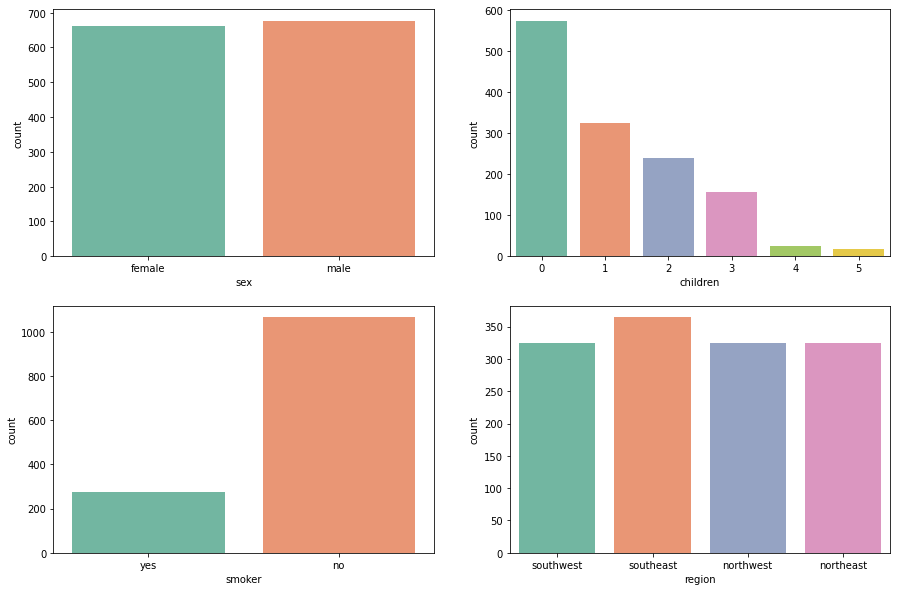

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.countplot(data = df, x = 'sex', palette='Set2' )

plt.subplot(2,2,2)
sns.countplot( data = df, x = 'children', palette='Set2')

plt.subplot(2,2,3)
sns.countplot(data = df, x = 'smoker', palette='Set2')

plt.subplot(2,2,4)
sns.countplot(data = df, x = 'region', palette='Set2')

Looking at the categorical variables we can see that we have practically the same number between men and women, the more the number of children, the less values ​​we have, with the highest value people who do not have any children, when we look at the smoker variable we can see that most of our base is non-smokers and we can see that our base is well distributed in the region.

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Now, we will compare our variables with our target variable. However, we might get some interesting insights.

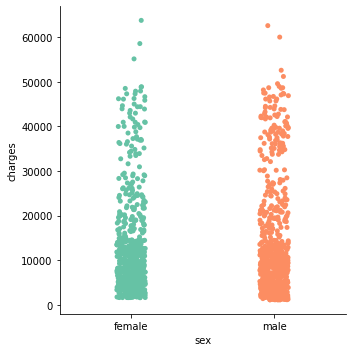

In [ ]:
sns.catplot(data = df, x = 'sex', y = 'charges', palette = 'Set2')

Here, we can see, both male and female charges for health insurance are almost similar.

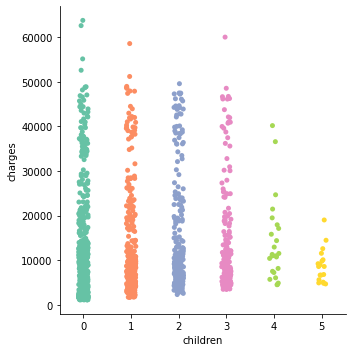

In [ ]:
sns.catplot(data = df, x = 'children', y = 'charges', palette = 'Set2')

Here, we can see, people who have 5 children pay less charges than others and the people with no or 0 children pay high charges for health insurance.

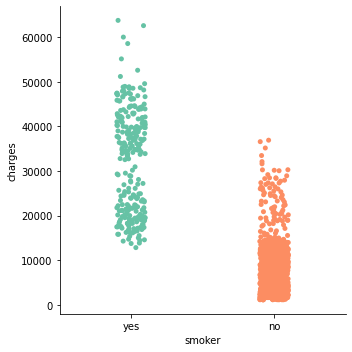

In [ ]:
sns.catplot(data = df, x = 'smoker', y = 'charges', palette = 'Set2')

Here, we can see, smoker pay high charges for health insurance compare to non-smoker.

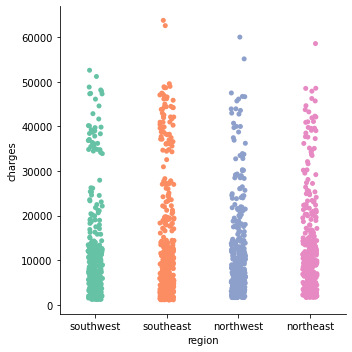

In [ ]:
sns.catplot(data = df, x = "region", y = "charges", palette = "Set2")

Here, we can see, people from Sountheast and Northwest pay high charges for health insurance compare to Southwest and Northeast.

In a nutshell, we can say, smokers have higher values ​​than non-smokers, and people who have 5 children pay less than others, when we look at the region we don't see There is a lot of difference in prices, when we look at the BMI we have a greater concentration of amounts paid between 30 and 40, however these values ​​are not self-explanatory because we also have many people with the BMI in this range who pay little.

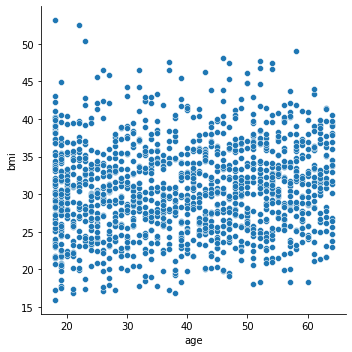

In [ ]:
sns.relplot(x='age', y = 'bmi' , data = df)

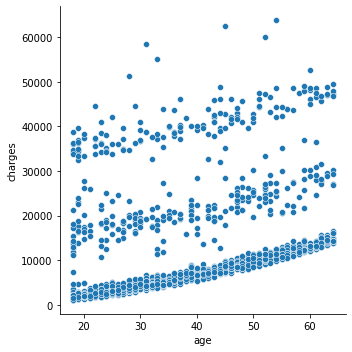

In [ ]:
sns.relplot(data = df, x='age', y = 'charges')

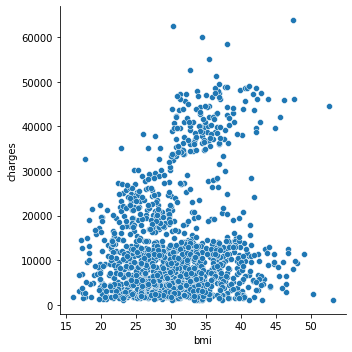

In [ ]:
sns.relplot(data = df, x='bmi', y = 'charges')

This Relational Plot is kind of hard to understand. Now we will try to visualize some data with Box plot to gain more insights.

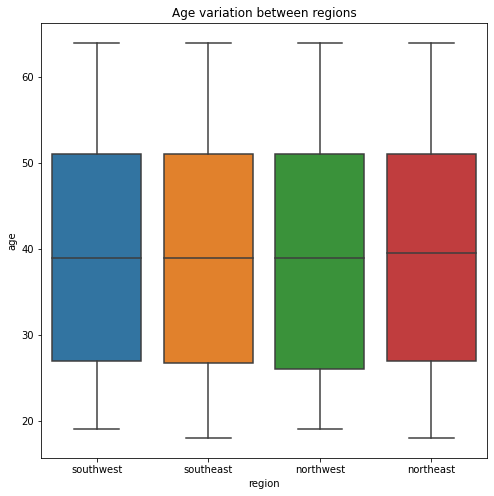

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='region', y='age')
plt.title('Age variation between regions')
plt.show()

With these boxplot that shows the distribution of ages per region, we can also see that the overall population age between regions is very similar. There are also not age outliers in any region.

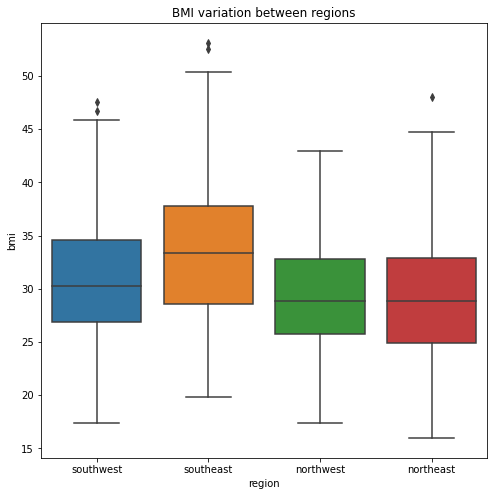

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='region', y='bmi')
plt.title('BMI variation between regions')
plt.show()

We can see that all regions have most of people above the ideal bmi interval (18.5 to 24.9). However we can see that the southeast region have people with higher weight to body ratio

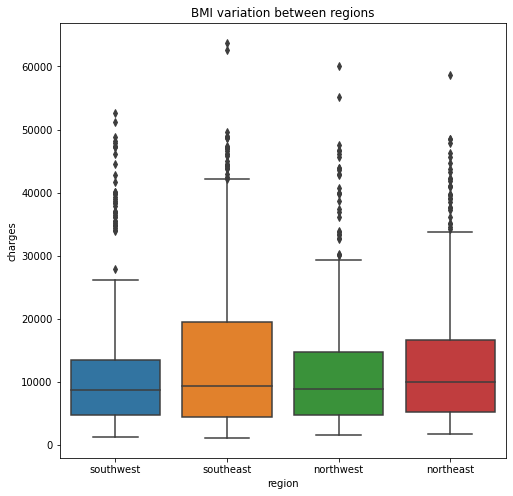

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='region', y='charges')
plt.title('BMI variation between regions')
plt.show()

We can see a small correlation with bmi and charges in the southeast region

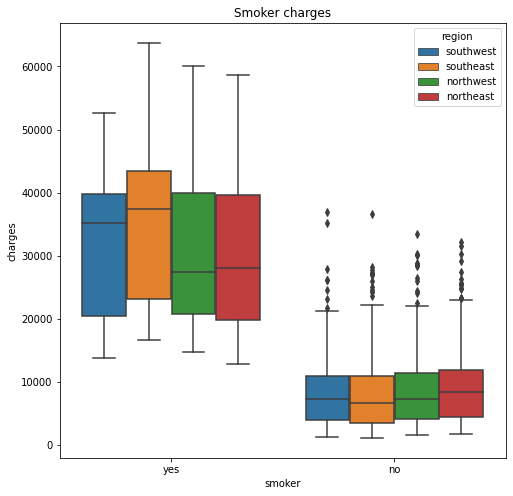

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='smoker', y='charges', hue= 'region')
plt.title('Smoker charges')
plt.show()

The fact of someone being a smoker and the charges is high compare to non-smoker in all regions.

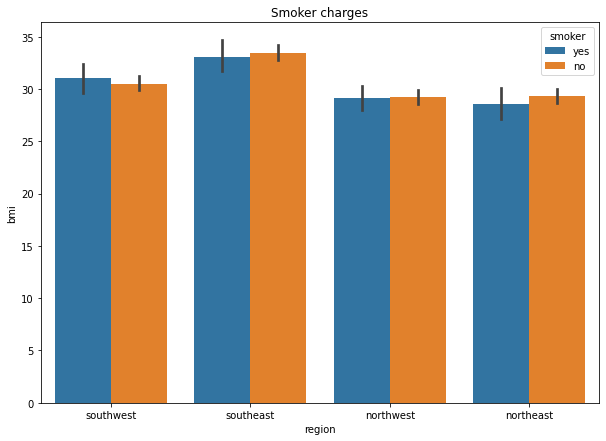

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data = df, x='region',y='bmi',hue='smoker')
plt.title('Smoker charges')
plt.show()

Here, with barplot we see the smoker column has practically a normal distribution with correspondence to region and bmi.

[]

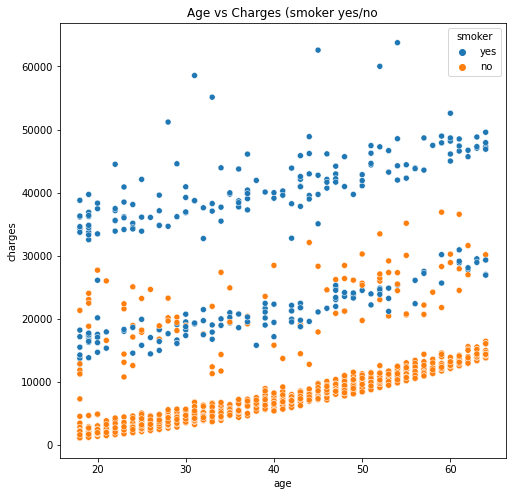

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges (smoker yes/no')
plt.plot()

We can clearly see a distintion of charges vs age, for someone that doesn't smoke and someone that smokes

[]

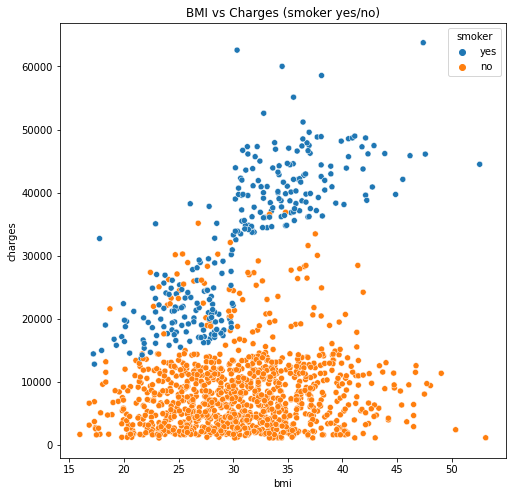

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges (smoker yes/no)')
plt.plot()

From the graphic above we can conclude that a higher bmi doesn't mean a higher charges.Although again if a person smokes, there is a clear distinction.

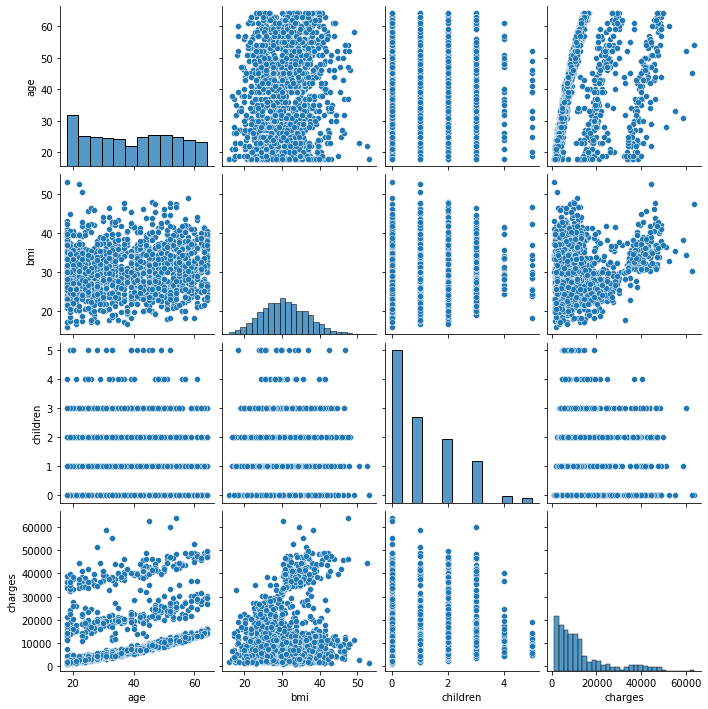

In [ ]:
sns.pairplot(df)
plt.show()

From the above pairplot we can see the overall correlation of dataset.

# **Model Building**

# **Creating Feature columns and Target column**

Here, 

age, sex,	bmi,	children,	smoker,	region are Feature Variables and 

charges is the Target Variable.

In [ ]:
X = df.iloc[:, 0:6].values
y = df.iloc[:, 6].values

# **Label Encoder**

## **Using LabelEncoder to transform categorical variables into continuous variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [ ]:
label_encoding('smoker')
label_encoding('sex')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


# **One-Hot Encoding**

**One Hot Encoding is a common way of preprocessing categorical features for machine learning models. This type of encoding creates a new binary feature for each possible category and assigns a value of 1 to the feature of each sample that corresponds to its original category.**

In [ ]:
one_hot = pd.get_dummies(df['region'])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
df = pd.concat([df, one_hot],axis = 1)
df.drop('region',axis = 1, inplace = True)
df.head() 

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Now data is all numerical

In [ ]:
X = df.drop('charges',axis=1)
y = df['charges']

# **Normalization Technique -->  Min-Max Scaler**

## **Applying MinMaxScaler in data to put the data in the same size setting**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

## **Transforming Data into Train and Test data, here we will use 30% of our data to test the machine learning model polynomial regression to predict & test.**


# **Creating training and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

((936, 9), (936,))

In [ ]:
X_test.shape, y_test.shape

((402, 9), (402,))

# **Linear Regression With Polynomial Features**


## **Polynomial Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Here we are going to use Degree in 2.

poly = PolynomialFeatures(degree = 2)

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
X_poly_train.shape, X_poly_test.shape

print('X_poly_train.shape:', X_poly_train.shape)
print('X_poly_test.shape: ', X_poly_test.shape)


lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

lr_poly_normal_score_train = lr_poly.score(X_poly_train, y_train)
lr_poly_normal_score_train

print('Accuracy in the training base:', lr_poly_normal_score_train)

X_poly_train.shape: (936, 55)
X_poly_test.shape:  (402, 55)
Accuracy in the training base: 0.8302034528558708


## **Accuracy**

In [ ]:
lr_poly_normal_score_test = lr_poly.score(X_poly_test, y_test)
lr_poly_normal_score_test
print('Accuracy in the test base:', lr_poly_normal_score_test)

Accuracy in the test base: 0.8723476822107891


Looking at our scores in the training base and in the test base, in the training base we have 83% of accuracy, it is a good number, when we look at the test base we had an improvement, in it we reached 87%

# **Evaluation Metrics**


## **We will use  Mean Absolute Error(MAE), Mean Squared Error(MSE) and Root Mean Square Error (RMSE), R-squared.**

# **Mean Absolute Error(MAE)**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
prediction = lr_poly.predict(X_poly_test)

mae_poly_normal = mean_absolute_error(y_test, prediction)

mae_poly_normal

print('Mean absolute error:', mae_poly_normal )

Mean absolute error: 2884.177653430348


# **Mean Squared Error(MSE)**

In [ ]:
prediction = lr_poly.predict(X_poly_test)

mse_poly_normal = mean_squared_error(y_test, prediction)

mse_poly_normal

print('Mean squared error:', mse_poly_normal )

Mean squared error: 20356646.837845854


# **Root Mean Square Error (RMSE)**





In [ ]:
rmse_poly_normal = np.sqrt(mean_squared_error(y_test, prediction))
rmse_poly_normal

print('Root Mean Square Error (RMSE):', rmse_poly_normal)

Root Mean Square Error (RMSE): 4511.834088022947


# **R-squared**

In [ ]:
r2_score(prediction, y_test)

0.8571502510645043

Here, we can see, different values for different evaluation metrics.


# **Visualizing the Polymonial Regression Results till 10 degree**

[[1.         0.02173913 0.         ... 0.         0.         1.        ]
 [1.         0.         1.         ... 1.         0.         0.        ]
 [1.         0.2173913  1.         ... 1.         0.         0.        ]
 ...
 [1.         0.         0.         ... 1.         0.         0.        ]
 [1.         0.06521739 0.         ... 0.         0.         1.        ]
 [1.         0.93478261 0.         ... 0.         0.         0.        ]]


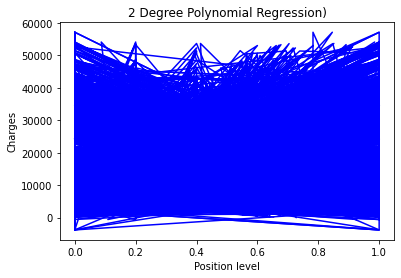

In [ ]:
i = 2
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X)
print(X_poly)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title(f'{i} Degree Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Charges')
plt.show()

22747067.672030304


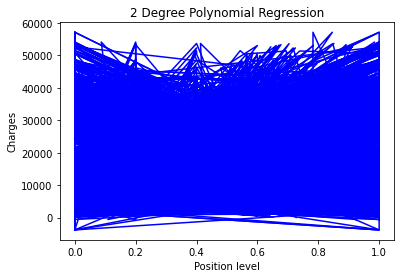

20876043.46154397


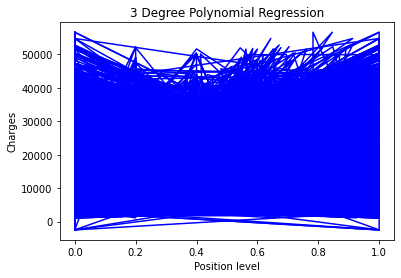

18786267.588474236


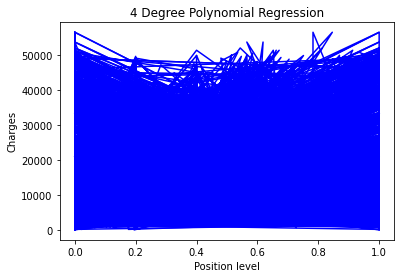

24342592.719412632


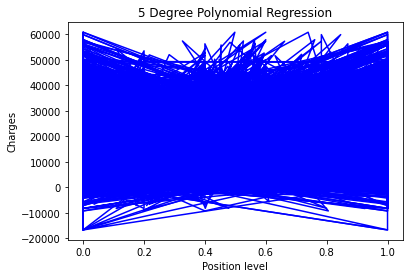

10014472.056559639


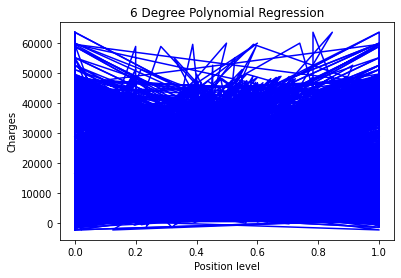

6771815.928690444


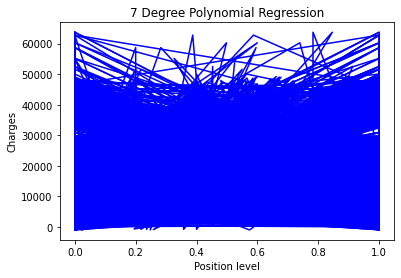

3138976.1549864914


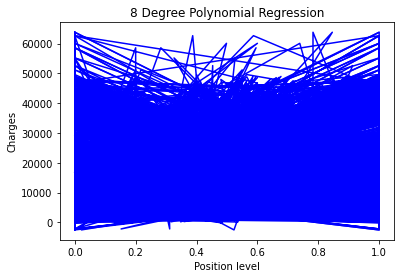

1217512.181754376


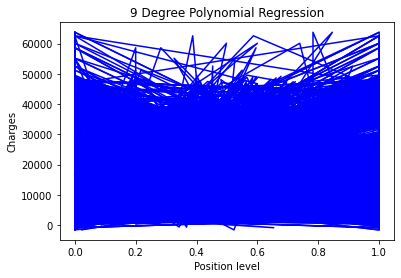

559126.7124820813


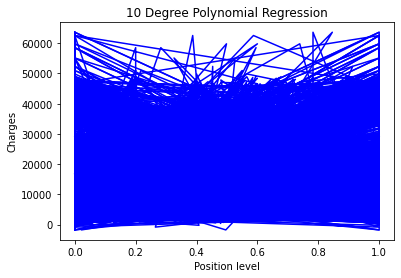

In [ ]:
for i in range(2, 11):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)

    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)


    # Visualizing the Polymonial Regression results
    print(mean_squared_error(y, pol_reg.predict(poly_reg.fit_transform(X))))

    
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title(f'{i} Degree Polynomial Regression')
    plt.xlabel('Position level')
    plt.ylabel('Charges')
    plt.show()


only for 10 degree polynomial regression we got a better value.